In [4]:
import yfinance as yf
import pandas as pd
from backtesting import Backtest, Strategy

data = yf.download("^GSPC", start="2015-01-01", end="2024-12-31")
print(data.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_29340\238921963.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000


In [5]:
data.shape

(2515, 5)

In [7]:
print(data.columns)
print(data.describe())

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])
Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count   2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03
mean    3355.120803  3372.436613  3335.465538  3354.639742  4.005896e+09
std     1082.942998  1088.168307  1077.207756  1082.720781  9.573387e+08
min     1829.079956  1847.000000  1810.099976  1833.400024  0.000000e+00
25%     2432.114990  2441.444946  2420.329956  2431.929932  3.428045e+09
50%     3004.520020  3016.310059  2990.669922  3004.260010  3.820250e+09
75%     4204.209961  4232.940186  4183.314941  4205.994873  4.341740e+09
max     6090.270020  6099.970215  6079.979980  6089.029785  9.976520e+09


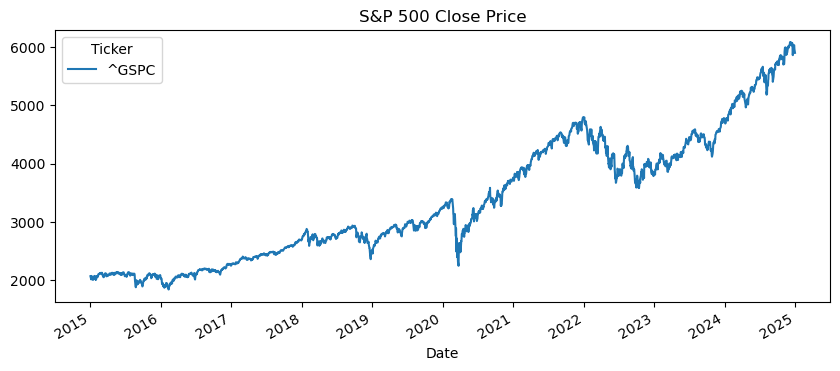

In [11]:
import matplotlib.pyplot as plt

data["Close"].plot(figsize=(10, 4))
plt.title("S&P 500 Close Price")
plt.show()

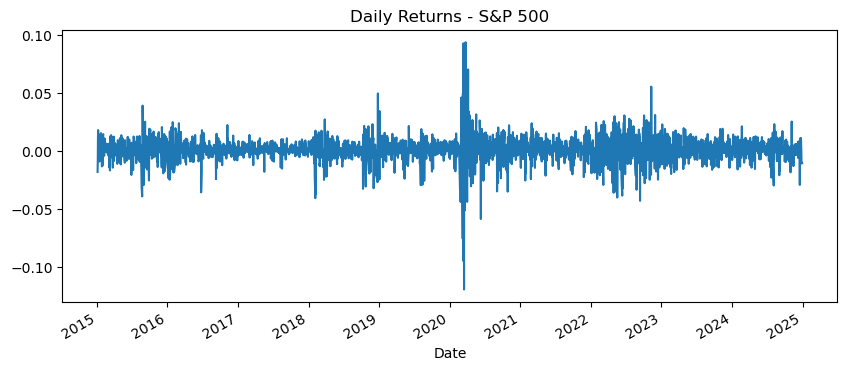

In [12]:
data["Returns"]=data["Close"].pct_change()
data["Returns"].plot(figsize=(10, 4))
plt.title("Daily Returns - S&P 500")
plt.show()

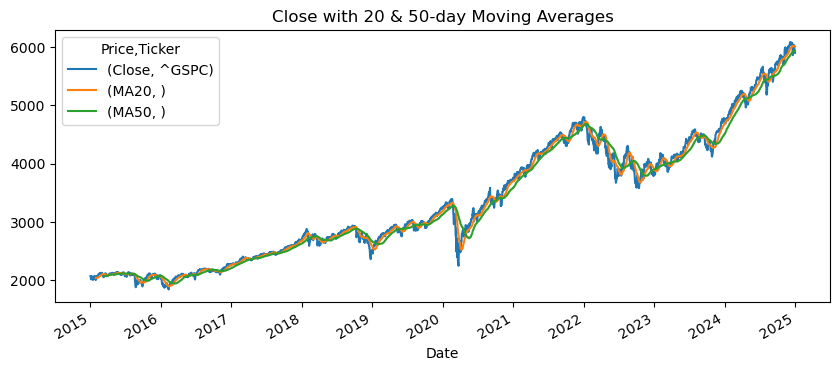

In [13]:
data["MA20"]=data["Close"].rolling(window=20).mean()
data["MA50"]=data["Close"].rolling(window=50).mean()

data[["Close", "MA20", "MA50" ]].plot(figsize=(10, 4))
plt.title("Close with 20 & 50-day Moving Averages")
plt.show()

In [14]:
print(data.isna().sum())

Price    Ticker
Close    ^GSPC      0
High     ^GSPC      0
Low      ^GSPC      0
Open     ^GSPC      0
Volume   ^GSPC      0
Returns             1
MA20               19
MA50               49
dtype: int64


In [15]:
data = data.dropna()
print(data.isna().sum())
print(data.shape)


Price    Ticker
Close    ^GSPC     0
High     ^GSPC     0
Low      ^GSPC     0
Open     ^GSPC     0
Volume   ^GSPC     0
Returns            0
MA20               0
MA50               0
dtype: int64
(2466, 8)


In [16]:
import os
os.makedirs("data", exist_ok=True)
data.to_csv("data/sp500_2015_2024.csv")


In [17]:
df_raw = pd.read_csv("data/sp500_2015_2024.csv")
print(df_raw.head())
print(df_raw.columns)


        Price              Close               High               Low  \
0      Ticker              ^GSPC              ^GSPC             ^GSPC   
1        Date                NaN                NaN               NaN   
2  2015-03-16   2081.18994140625  2081.409912109375  2055.35009765625   
3  2015-03-17  2074.280029296875  2080.590087890625    2065.080078125   
4  2015-03-18             2099.5   2106.85009765625  2061.22998046875   

                Open      Volume   Returns         MA20         MA50  
0              ^GSPC       ^GSPC       NaN          NaN          NaN  
1                NaN         NaN       NaN          NaN          NaN  
2   2055.35009765625  3295600000  0.013534  2091.118988  2059.713201  
3  2080.590087890625  3221840000 -0.003320  2089.815985  2060.034802  
4  2072.840087890625  4128210000  0.012158  2089.806989  2061.613203  
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'MA20',
       'MA50'],
      dtype='object')


In [19]:
import pandas as pd

df_raw = pd.read_csv("data/sp500_2015_2024.csv")

mask = df_raw["Price"].str.match(r"\d{4}-\d{2}-\d{2}", na=False)
df_raw = df_raw[mask].copy()

df_raw = df_raw.rename(columns={"Price": "Date"})
df_raw["Date"] = pd.to_datetime(df_raw["Date"], format="%Y-%m-%d")

df = df_raw[["Date", "Close", "High", "Low", "Open", "Volume", "Returns", "MA20", "MA50"]].copy()

df = df.set_index("Date").sort_index()

print(df.head())
print(df.shape)


                        Close               High                Low  \
Date                                                                  
2015-03-16   2081.18994140625  2081.409912109375   2055.35009765625   
2015-03-17  2074.280029296875  2080.590087890625     2065.080078125   
2015-03-18             2099.5   2106.85009765625   2061.22998046875   
2015-03-19   2089.27001953125   2098.68994140625   2085.56005859375   
2015-03-20   2108.10009765625     2113.919921875  2090.320068359375   

                         Open      Volume   Returns         MA20         MA50  
Date                                                                           
2015-03-16   2055.35009765625  3295600000  0.013534  2091.118988  2059.713201  
2015-03-17  2080.590087890625  3221840000 -0.003320  2089.815985  2060.034802  
2015-03-18  2072.840087890625  4128210000  0.012158  2089.806989  2061.613203  
2015-03-19   2098.68994140625  3305220000 -0.004873  2089.397992  2063.346404  
2015-03-20  2090.32006

In [20]:
df.to_csv("data/sp500_2015_2024_clean.csv")